# Credit Card Analysis of MBL : Data Preparation and Model Comparision


The main objective of this piece of code is to classify the default customer and non default customer according to
the data collected with minimum cleaning of noisy or unknown data from the cutomer details. Customer with all maximum value
not known is omitted here and only the customer with maximum value in fetaures are included here.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from IPython.display import display, HTML
%matplotlib inline

In [2]:
#set the output path 
out_path = "D:\credit card\\ml_data\\"

In [3]:
#reading file 
df_bill = pd.read_excel("D:\credit card\\MBL CR BILL REPORT  06112018.xls")
df_initial = pd.read_csv("D:\credit card\\for_ML.csv",index_col = 0)

WARNING *** file size (1164554) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [4]:
#listing card number form bill and customer details
bill_card_number = [i for i in df_bill.CARD_NUMBER]
initial_card_number = [i for i in df_initial.CARD_NUMBER]

In [5]:
#separate only max aging and card number from billing dataset
df_bill1 = df_bill[df_bill.columns[[5,16]]]

In [6]:
#merge billing details and customer details
df_initial2 = pd.merge(df_bill1,df_initial,on="CARD_NUMBER",how="inner")

In [7]:
df_initial2.head()

,CARD_NUMBER,MAX_AGING,Gender,MARITAL_STATUS,POSITION,ANNUAL_INCOME_RANGE,Type of employment,YEARS OF EMPLOYMENT,EDUCATION,OTHER BANK DETAILS,NO OF DEPENDENT,SOURCE OF INCOME,PROFESSION,age,customer_type,label,behaviour
0,4020641000011543,2,Male,Married,Owner,unknown,Self-employed,unknown,Graduate,unknown,2,Business,unknown,32,CLIENT,0,0
1,4020641000011048,0,Male,Married,unknown,720000.0,confidential,unknown,unknown,unknown,unknown,unknown,unknown,32,CLIENT,0,0
2,4020641000006345,0,Male,Married,Program Co-ordinator,unknown,Employee,more than 10 years,unknown,NIBL,2,Salary,Employee,42,CLIENT,0,1
3,4020641000006212,0,Male,Married,MD,3600000.0,Self-employed,5 to 10 years,Intermediate,unknown,3,Salary,Employee,47,CLIENT,0,1
4,4020641000006253,0,Male,Married,Accountant,unknown,Employee,more than 10 years,unknown,unknown,Salary,Employee,Private,44,CLIENT,0,0


In [8]:
df_initial2.shape

(502, 17)

Here we have only have 502 observation i.e 502 customer details with maximum known value and 22 features.

In [9]:
list(df_initial2)

['CARD_NUMBER',
 'MAX_AGING',
 'Gender',
 'MARITAL_STATUS',
 'POSITION',
 'ANNUAL_INCOME_RANGE',
 'Type of employment',
 'YEARS OF EMPLOYMENT',
 'EDUCATION',
 'OTHER BANK DETAILS',
 'NO OF DEPENDENT',
 'SOURCE OF INCOME',
 'PROFESSION',
 'age',
 'customer_type',
 'label',
 'behaviour']

In [10]:
#checking unique value
print(df_initial.MARITAL_STATUS.unique())
print(df_initial2.Gender.unique())
print(df_initial2.POSITION.unique())

['Married' 'Unmarried' 'unknown' 'Single']
['Male' 'Female']
['Owner' 'unknown' 'Program Co-ordinator' 'MD' 'Accountant' 'CEO'
 'Program Manager' 'Proprietor' 'Assistant Director' 'SR. Assistant'
 'Managing Director' 'Account Manager' 'Promoter' 'Sr. Officer'
 'Principal' 'Chairman' 'Assistant Manager' 'Physician' 'Deputy Director'
 'Teacher' 'Assitant DIrector' 'Finance Manager' 'Self Employed'
 'Consult Physician' 'Shareholder' 'Physiotherapist' 'Assistant'
 'General Manager' 'Business Analyst' 'Messsenger' 'Civil Engineer'
 'Manger' 'Admin Officer' 'Senior- Officer' 'Designing Engineer'
 'Retired Army' 'Gynecologist' 'ED' 'Manager' 'Sales Manger'
 'Junior officer' 'Officer' 'Coordinator' 'Associate software Engineer'
 'Assistant General Manager' 'Chief Finance Officer' 'First Officer'
 'Police Officer' 'Senior Marketing Manager' 'Tour Officer'
 'Admission Officer' 'Director' 'Marketing Manager' 'Finance Officer'
 'Captain' 'Jr. Business Analyst' 'Driver' 'Instructor'
 'Senior Consul

In [11]:
#making new columns according to max aging details
df_initial2['current'] = np.where(df_initial2['MAX_AGING'] == 0, 1, 0)
df_initial2['dirty'] = np.where(df_initial2['MAX_AGING'] > 0, 1, 0)
df_initial2['30dpd'] = np.where(df_initial2['MAX_AGING'] == 1, 1, 0)
df_initial2['60dpd'] = np.where(df_initial2['MAX_AGING'] == 2, 1, 0)
df_initial2['Default'] = np.where(df_initial2['MAX_AGING'] > 3, 1, 0)

Customer with maximum aging of 3 or more than 3 months have been categorize into default customer. So, Our label here will be default column

In [12]:
df_initial2.shape

(502, 22)

In [13]:
df_initial2.head(2)

,CARD_NUMBER,MAX_AGING,Gender,MARITAL_STATUS,POSITION,ANNUAL_INCOME_RANGE,Type of employment,YEARS OF EMPLOYMENT,EDUCATION,OTHER BANK DETAILS,...,PROFESSION,age,customer_type,label,behaviour,current,dirty,30dpd,60dpd,Default
0,4020641000011543,2,Male,Married,Owner,unknown,Self-employed,unknown,Graduate,unknown,...,unknown,32,CLIENT,0,0,0,1,0,1,0
1,4020641000011048,0,Male,Married,unknown,720000.0,confidential,unknown,unknown,unknown,...,unknown,32,CLIENT,0,0,1,0,0,0,0


In [14]:
df_initial2.to_csv(out_path+'\\MBL_processed_data.csv')

In [15]:
df_1 = df_initial2.copy()

In [16]:
# df_1a = df_1[df_1['60dpd'] == 0]
# df_2 = df_1a[df_1a['Default'] == 0]
# # df_2.drop(['60dpd','Default'],axis =1)
# print(df_1a.shape,df_2.shape)

For plotting graph

In [17]:
import matplotlib.pyplot as plt
plt.rc("font",size=12)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [18]:
#drop unnecessary features from copied dataset
df_model = df_1.copy()
df_model = df_model.drop(['customer_type','behaviour','PROFESSION','60dpd','label','30dpd'],axis=1)

In [19]:
df_model.dtypes

CARD_NUMBER             int64
MAX_AGING               int64
Gender                 object
MARITAL_STATUS         object
POSITION               object
ANNUAL_INCOME_RANGE    object
Type of employment     object
YEARS OF EMPLOYMENT    object
EDUCATION              object
OTHER BANK DETAILS     object
NO OF DEPENDENT        object
SOURCE OF INCOME       object
age                     int64
current                 int32
dirty                   int32
Default                 int32
dtype: object

In [20]:
#changing datatype of features
df_model = df_model.astype({"Gender": str, "MARITAL_STATUS": str, "POSITION": str, "Type of employment": str, 
                            "YEARS OF EMPLOYMENT": str,"EDUCATION": str, "NO OF DEPENDENT": str,"SOURCE OF INCOME": str,"age":int,"Default":int})

In [21]:
#counting the label balance of default customer
df_model['Default'].value_counts()

0    486
1     16
Name: Default, dtype: int64

We can see the label is not balance 

In [22]:
# df_model.rename(columns = {'Default':'30dpd'},inplace = True)

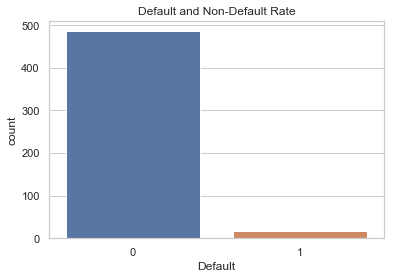

In [23]:
sns.countplot(x='Default',data=df_model)
# plt.show()
plt.title('Default and Non-Default Rate')
plt.savefig('counts_plot')

In [24]:
count_no_del = len(df_model[df_model['Default']==0])
count_del = len(df_model[df_model['Default']==1])
pct_no_del = count_no_del/(count_no_del+count_del) 
pct_del= count_del/(count_no_del+count_del)
print("Percentage of delinquent is:", pct_del*100)
print("Percentage of no delinquent is:", pct_no_del*100)

Percentage of delinquent is: 3.187250996015936
Percentage of no delinquent is: 96.81274900398407


In [25]:
df_model.groupby('Default').mean()
df_model.rename(columns={'Default':'y'},inplace=True)

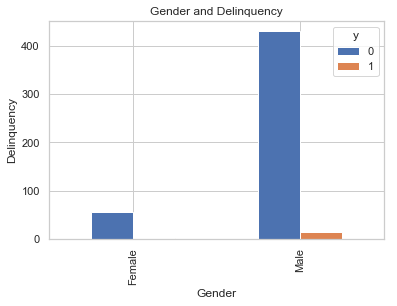

In [26]:
pd.crosstab(df_model.Gender, df_model.y).plot(kind='bar')
plt.title('Gender and Delinquency')
plt.xlabel('Gender')
plt.ylabel('Delinquency')
plt.savefig('Gender_delinquency')

In [27]:
df_model.Gender.unique()

array(['Male', 'Female'], dtype=object)

y,0,1
Gender,,
Female,55,2
Male,431,14


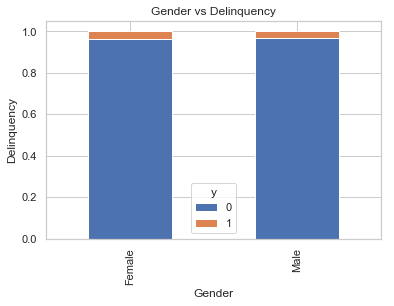

In [28]:
#Instead of comparing absolute numbers, let's compare percentages

#First, the distribution in Gender. 

table=pd.crosstab(df_model.Gender, df_model.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Gender vs Delinquency')
plt.xlabel('Gender')
plt.ylabel('Delinquency')
plt.savefig('gender_vs_del_stack')

# The missing gender data behavior is closer to 2, ie female. 
table

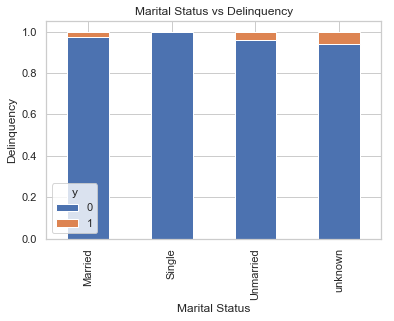

In [29]:
#The distribution in Marital Status. 
table=pd.crosstab(df_model.MARITAL_STATUS, df_model.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Marital Status vs Delinquency')
plt.xlabel('Marital Status')
plt.ylabel('Delinquency')
plt.savefig('martStat_vs_del_stack')
# the category "single" can be ignored, this is data garbage. Theres one account tagged single.

In [30]:
#As annual income range contain unknown strings we replace it by 0
df_model.ANNUAL_INCOME_RANGE = df_model.ANNUAL_INCOME_RANGE.replace("unknown","0")
df_model.ANNUAL_INCOME_RANGE = pd.to_numeric(df_model.ANNUAL_INCOME_RANGE, errors='coerce').fillna(0).astype(np.int64)

In [31]:
mean_ANNUAL_INCOME_RANGE = df_model['ANNUAL_INCOME_RANGE'].mean(skipna=True)
mean_ANNUAL_INCOME_RANGE

1455651.1334661355

In [32]:
#replaing 0 annual income with average annual income range
df_model.ANNUAL_INCOME_RANGE.loc[df_model.ANNUAL_INCOME_RANGE == 0] = mean_ANNUAL_INCOME_RANGE
df_model.ANNUAL_INCOME_RANGE = df_model.ANNUAL_INCOME_RANGE.astype(np.int64)

d:\env\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


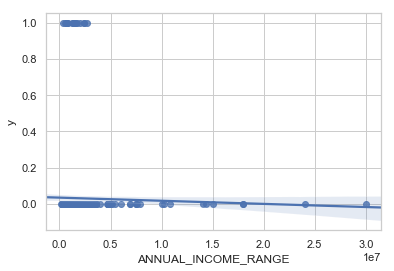

In [33]:
# lets do some scatterplot using continous data
sns.regplot(x=df_model['ANNUAL_INCOME_RANGE'], y=df_model['y'])
#it isnt going to mean much because the dependent variable is not continous it is categorical. 
#Now lets get along with building the model

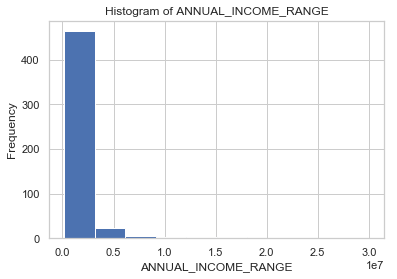

In [34]:
df_model.ANNUAL_INCOME_RANGE.hist()
plt.title('Histogram of ANNUAL_INCOME_RANGE')
plt.xlabel('ANNUAL_INCOME_RANGE')
plt.ylabel('Frequency')
plt.savefig('hist_inc')

In [35]:
# df_model_final.loc[df_model_final['MARITAL_STATUS']=="Single",'MARITAL_STATUS']=2

In [36]:
list(df_model)

['CARD_NUMBER',
 'MAX_AGING',
 'Gender',
 'MARITAL_STATUS',
 'POSITION',
 'ANNUAL_INCOME_RANGE',
 'Type of employment',
 'YEARS OF EMPLOYMENT',
 'EDUCATION',
 'OTHER BANK DETAILS',
 'NO OF DEPENDENT',
 'SOURCE OF INCOME',
 'age',
 'current',
 'dirty',
 'y']

In [37]:
#as position contains inconsistent data and noisy data we remove the position columns for now #need to care while collecting the data
df_model.POSITION.unique()
df_model = df_model.drop("POSITION",axis=1)

In [38]:
#checking unique columns
print(df_model['Type of employment'].unique())
print(df_model.EDUCATION.unique())

['Self-employed' 'confidential' 'Employee' 'Army' 'Employer']
['Graduate' 'unknown' 'Intermediate' 'Post-graduated' 'Under Graduate'
 'Graduated' 'Post Graduate' 'Under Graduated' 'Others' 'Under graduate'
 'MBL Home Loan' ' ' 'Post graduate' 'Poat Graduate']


In [39]:
#We can see education column has inconsistent data so cleaning is required
def make_consistent_education(i):
        if (i.startswith("P") or i.startswith("p")):
            return("post_graduate")
        elif(i.startswith("U") or i.startswith("u")):
            return "under_graduate"
        elif(i.startswith("Inter") or i.startswith("inter")):
            return "intermediate"
        elif(i.startswith("G") or i.startswith("g")):
            return "graduate"
        else:
            return np.nan

In [40]:
df_model.EDUCATION  = df_model.EDUCATION.apply(lambda x: make_consistent_education(x))
df_model.EDUCATION.unique()

array(['graduate', 'under_graduate', 'intermediate', 'post_graduate', nan],
      dtype=object)

In [41]:
list(df_model)

['CARD_NUMBER',
 'MAX_AGING',
 'Gender',
 'MARITAL_STATUS',
 'ANNUAL_INCOME_RANGE',
 'Type of employment',
 'YEARS OF EMPLOYMENT',
 'EDUCATION',
 'OTHER BANK DETAILS',
 'NO OF DEPENDENT',
 'SOURCE OF INCOME',
 'age',
 'current',
 'dirty',
 'y']

In [42]:
df_model['YEARS OF EMPLOYMENT'].unique()

array(['unknown', 'more than 10 years', '5 to 10 years',
       'More than 10 years', '2 to 5 years', '3 to 5 years',
       '0 to 2 years', 'Employed ', 'Employee', ' 2 to 5 years',
       'Over 10 years', '2 to 5 Years', 'Self employed', 'below 1 year',
       '10 years'], dtype=object)

In [43]:
df_model.loc[df_model['MARITAL_STATUS']=="Single",'MARITAL_STATUS']="Unmarried"

In [44]:
#cleaning the years of employment inconsistent data
df_model.loc[df_model['YEARS OF EMPLOYMENT']=="more than 10 years",'YEARS OF EMPLOYMENT']="more_than_10yrs"
df_model.loc[df_model['YEARS OF EMPLOYMENT']=="Over 10 years",'YEARS OF EMPLOYMENT']="more_than_10yrs"
df_model.loc[df_model['YEARS OF EMPLOYMENT']=="10 years",'YEARS OF EMPLOYMENT']="more_than_10yrs"
df_model.loc[df_model['YEARS OF EMPLOYMENT']=="5 to 10 years",'YEARS OF EMPLOYMENT']="5_to_10yrs"
df_model.loc[df_model['YEARS OF EMPLOYMENT']=="More than 10 years",'YEARS OF EMPLOYMENT']="more_than_10yrs"
df_model.loc[df_model['YEARS OF EMPLOYMENT']=="3 to 5 years",'YEARS OF EMPLOYMENT']="2_to_5yrs"
df_model.loc[df_model['YEARS OF EMPLOYMENT']=="2 to 5 years",'YEARS OF EMPLOYMENT']="2_to_5yrs"
df_model.loc[df_model['YEARS OF EMPLOYMENT']==" 2 to 5 years",'YEARS OF EMPLOYMENT']="2_to_5yrs"
df_model.loc[df_model['YEARS OF EMPLOYMENT']=="2 to 5 Years",'YEARS OF EMPLOYMENT']="2_to_5yrs"
df_model.loc[df_model['YEARS OF EMPLOYMENT']=="0 to 2 years",'YEARS OF EMPLOYMENT']="0_to_2yrs"
df_model.loc[df_model['YEARS OF EMPLOYMENT']=="below 1 year",'YEARS OF EMPLOYMENT']="0_to_2yrs"
df_model.loc[df_model['YEARS OF EMPLOYMENT']=="unknown",'YEARS OF EMPLOYMENT']="5_to_10yrs"
df_model.loc[df_model['YEARS OF EMPLOYMENT']=="Self employed",'YEARS OF EMPLOYMENT']=np.nan
df_model.loc[df_model['YEARS OF EMPLOYMENT']=="Employee",'YEARS OF EMPLOYMENT']=np.nan
df_model.loc[df_model['YEARS OF EMPLOYMENT']=="Employed ",'YEARS OF EMPLOYMENT']=np.nan

In [45]:
df_model['YEARS OF EMPLOYMENT'].value_counts()

5_to_10yrs         290
2_to_5yrs          117
more_than_10yrs     77
0_to_2yrs           15
Name: YEARS OF EMPLOYMENT, dtype: int64

In [46]:
df_model.loc[(df_model["OTHER BANK DETAILS"]!="unknown")&(df_model["OTHER BANK DETAILS"]!='None'),"OTHER BANK DETAILS"] = "yes"

In [47]:
df_model["OTHER BANK DETAILS"].value_counts()

unknown    233
None       172
yes         97
Name: OTHER BANK DETAILS, dtype: int64

In [48]:
list(df_model)

['CARD_NUMBER',
 'MAX_AGING',
 'Gender',
 'MARITAL_STATUS',
 'ANNUAL_INCOME_RANGE',
 'Type of employment',
 'YEARS OF EMPLOYMENT',
 'EDUCATION',
 'OTHER BANK DETAILS',
 'NO OF DEPENDENT',
 'SOURCE OF INCOME',
 'age',
 'current',
 'dirty',
 'y']

In [49]:
df_model['NO OF DEPENDENT'].value_counts()
#As we can see here no of dependent variable contains dirty data so we removed this column for now
df_model_final = df_model.drop(['NO OF DEPENDENT'],axis = 1)

In [50]:
list(df_model_final)

['CARD_NUMBER',
 'MAX_AGING',
 'Gender',
 'MARITAL_STATUS',
 'ANNUAL_INCOME_RANGE',
 'Type of employment',
 'YEARS OF EMPLOYMENT',
 'EDUCATION',
 'OTHER BANK DETAILS',
 'SOURCE OF INCOME',
 'age',
 'current',
 'dirty',
 'y']

In [51]:
df_model_final['SOURCE OF INCOME'].unique()

array(['Business', 'unknown', 'Salary', 'Employee', 'Business man',
       'Businessman', 'Banker', 'Pension', 'Salary and dividend',
       'Business and salary', 'Business women', 'House Rent',
       'Business Rent', 'Rent', 'Doctor', 'Salary and Rent', 'Physician',
       'Salary Rent Agriculture', 'Business and rental', 'Salary OT'],
      dtype=object)

In [52]:
def make_consistent_soi(i):
        splitstring = i.split(" ")
        if len(splitstring) > 1 :
            return "multiple_income"
        elif i.startswith("B") or i.startswith("b"):
            return "Business"
        elif i.startswith("Salary") or i.startswith("salary"):
            return "Salary"
        elif i.startswith("Unknown") or i.startswith("unknown"):
            return "unknown"
        else:
            return "others"

In [53]:
df_model_final['SOURCE OF INCOME']  = df_model_final['SOURCE OF INCOME'].apply(lambda x: make_consistent_soi(x))

In [54]:
df_model_final['SOURCE OF INCOME'].value_counts()

Salary             215
Business           175
unknown             90
multiple_income     11
others              11
Name: SOURCE OF INCOME, dtype: int64

In [55]:
list(df_model_final)

['CARD_NUMBER',
 'MAX_AGING',
 'Gender',
 'MARITAL_STATUS',
 'ANNUAL_INCOME_RANGE',
 'Type of employment',
 'YEARS OF EMPLOYMENT',
 'EDUCATION',
 'OTHER BANK DETAILS',
 'SOURCE OF INCOME',
 'age',
 'current',
 'dirty',
 'y']

In [56]:
df_model.age.unique()

array([ 32,  42,  47,  44,  35,  36,   0,  48,  22,  45,  43,  30,  28,
        34,  29,  27,  51,  31,  41,  37,  39,  38,  50,  -9,  49,  24,
        33,  46,  52,  25,  53,  21,  23,  40,  26,  97, -11,  56,  55,
        54,  64,  68,  59,  62,  -6,  57,  77,  69,  65], dtype=int64)

In [57]:
#we have negative age number which is not wrong so we have to clean that
#add 57 age to the negative age
df_model_final.loc[(df_model_final.age < 0),'age'] = df_model_final['age'].apply(lambda x : x+57)

In [58]:
#saving the data
df_model_final.to_csv(out_path+'\\MBL_processed_model_ready.csv')

In [59]:
data = df_model_final.copy()

In [60]:
cat_vars=['YEARS OF EMPLOYMENT','Type of employment','SOURCE OF INCOME','EDUCATION','Gender','MARITAL_STATUS','OTHER BANK DETAILS']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
data_vars=data.columns.values.tolist()


In [61]:
to_keep=[i for i in data_vars if i not in cat_vars]
data_final = data[to_keep]

In [62]:
data_final.to_csv(out_path+'\\MBL_processed_model_ready_data_Final.csv')

In [63]:
data_final.rename(columns={'y':'Default'},inplace=True)

d:\env\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [64]:
# from sklearn.cross_validation import train_test_split
#splitting into training and testing set
#we have to remove the bias from the dataset so we apply SMOTE method to make dataset balance
x = data_final.loc[:, data_final.columns != 'Default']
y = data_final.loc[:, data_final.columns == 'Default']

from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state=0)

columns = x_train.columns
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_transformed = scaler.transform(x_train)
x_test_transformed = scaler.transform(x_test)
os_data_x, os_data_y = os.fit_sample (x_train_transformed, y_train)
os_data_x = pd.DataFrame(data=os_data_x, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['Default'])

#let's check the numbers of obs in each of our datasets

print("length of oversampled data is",len(os_data_x))
print("Number of no delinquency in oversampled data",len(os_data_y[os_data_y['Default']==0]))
print("Number of delinquency", len(os_data_y[os_data_y['Default']==1]))
print("Percentage of no delinquency is ", len(os_data_y[os_data_y['Default']==0])/len(os_data_x))
print("Percentage of delinquency is ", len(os_data_y[os_data_y['Default']==1])/len(os_data_x))

length of oversampled data is 628
Number of no delinquency in oversampled data 314
Number of delinquency 314
Percentage of no delinquency is  0.5
Percentage of delinquency is  0.5


d:\env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
d:\env\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
d:\env\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
d:\env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


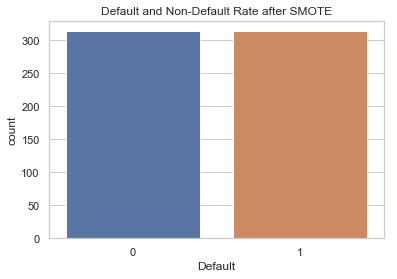

In [65]:
sns.countplot(x='Default',data=os_data_y)
# plt.show()
plt.title('Default and Non-Default Rate after SMOTE')
plt.savefig('counts_plot_smote')

In [66]:
data_final_vars=data_final.columns.values.tolist()
y=['Default']
X=[i for i in data_final_vars if i not in y]

In [67]:
os_data_x.columns

Index(['CARD_NUMBER', 'MAX_AGING', 'ANNUAL_INCOME_RANGE', 'age', 'current',
       'dirty', 'YEARS OF EMPLOYMENT_0_to_2yrs',
       'YEARS OF EMPLOYMENT_2_to_5yrs', 'YEARS OF EMPLOYMENT_5_to_10yrs',
       'YEARS OF EMPLOYMENT_more_than_10yrs', 'Type of employment_Army',
       'Type of employment_Employee', 'Type of employment_Employer',
       'Type of employment_Self-employed', 'Type of employment_confidential',
       'SOURCE OF INCOME_Business', 'SOURCE OF INCOME_Salary',
       'SOURCE OF INCOME_multiple_income', 'SOURCE OF INCOME_others',
       'SOURCE OF INCOME_unknown', 'EDUCATION_graduate',
       'EDUCATION_intermediate', 'EDUCATION_post_graduate',
       'EDUCATION_under_graduate', 'Gender_Female', 'Gender_Male',
       'MARITAL_STATUS_Married', 'MARITAL_STATUS_Unmarried',
       'MARITAL_STATUS_unknown', 'OTHER BANK DETAILS_None',
       'OTHER BANK DETAILS_unknown', 'OTHER BANK DETAILS_yes'],
      dtype='object')

In [68]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_x, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
print(rfe.estimator_) 

d:\env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ True  True  True False  True  True  True False  True  True False  True
 False  True False False  True False False  True  True False  True  True
 False False  True  True False  True  True  True]
[ 1  1  1  2  1  1  1  8  1  1 13  1 10  1 12  5  1  3  6  1  1  4  1  1
 11  7  1  1  9  1  1  1]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


d:\env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\env\lib\site-packages\sklearn\linear_model\logistic.py:43

In [69]:
print(os_data_x.columns[rfe.get_support()]) 

Index(['CARD_NUMBER', 'MAX_AGING', 'ANNUAL_INCOME_RANGE', 'current', 'dirty',
       'YEARS OF EMPLOYMENT_0_to_2yrs', 'YEARS OF EMPLOYMENT_5_to_10yrs',
       'YEARS OF EMPLOYMENT_more_than_10yrs', 'Type of employment_Employee',
       'Type of employment_Self-employed', 'SOURCE OF INCOME_Salary',
       'SOURCE OF INCOME_unknown', 'EDUCATION_graduate',
       'EDUCATION_post_graduate', 'EDUCATION_under_graduate',
       'MARITAL_STATUS_Married', 'MARITAL_STATUS_Unmarried',
       'OTHER BANK DETAILS_None', 'OTHER BANK DETAILS_unknown',
       'OTHER BANK DETAILS_yes'],
      dtype='object')


In [73]:
#choosing only useful variables
cols = ['ANNUAL_INCOME_RANGE','YEARS OF EMPLOYMENT_0_to_2yrs', 'YEARS OF EMPLOYMENT_5_to_10yrs',
       'YEARS OF EMPLOYMENT_more_than_10yrs', 'Type of employment_Employee',
       'Type of employment_Self-employed', 'SOURCE OF INCOME_Salary',
       'SOURCE OF INCOME_unknown', 'EDUCATION_graduate',
       'EDUCATION_post_graduate', 'EDUCATION_under_graduate',
       'MARITAL_STATUS_Married', 'MARITAL_STATUS_Unmarried',
       'OTHER BANK DETAILS_None', 'OTHER BANK DETAILS_unknown']

In [74]:
x=os_data_x[cols]
y=os_data_y['Default']

In [75]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.510658
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                  628
Model:                          Logit   Df Residuals:                      613
Method:                           MLE   Df Model:                           14
Date:                Sun, 06 Jan 2019   Pseudo R-squ.:                  0.2633
Time:                        12:44:32   Log-Likelihood:                -320.69
converged:                       True   LL-Null:                       -435.30
                                        LLR p-value:                 5.617e-41
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
ANNUAL_INCOME_RANGE                    -0.2353      0.137 

In [76]:
cols = ['ANNUAL_INCOME_RANGE','YEARS OF EMPLOYMENT_0_to_2yrs',
       'YEARS OF EMPLOYMENT_more_than_10yrs','Type of employment_Self-employed', 'SOURCE OF INCOME_Salary',
       'SOURCE OF INCOME_unknown', 'EDUCATION_graduate',
       'EDUCATION_post_graduate', 'EDUCATION_under_graduate',
       'MARITAL_STATUS_Married', 'MARITAL_STATUS_Unmarried']


In [77]:
x=os_data_x[cols]
y=os_data_y['Default']

logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.531413
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                  628
Model:                          Logit   Df Residuals:                      617
Method:                           MLE   Df Model:                           10
Date:                Sun, 06 Jan 2019   Pseudo R-squ.:                  0.2333
Time:                        12:44:40   Log-Likelihood:                -333.73
converged:                       True   LL-Null:                       -435.30
                                        LLR p-value:                 3.575e-38
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
ANNUAL_INCOME_RANGE                    -0.2515      0.138 

In [78]:
# cols = ['ANNUAL_INCOME_RANGE','YEARS OF EMPLOYMENT_0_to_2yrs',
#        'YEARS OF EMPLOYMENT_more_than_10yrs','Type of employment_Self-employed', 'SOURCE OF INCOME_Salary',
#        'SOURCE OF INCOME_unknown', 'EDUCATION_graduate',
#        'EDUCATION_post_graduate', 'EDUCATION_under_graduate',
#        'MARITAL_STATUS_Married', 'MARITAL_STATUS_Unmarried']
# x=os_data_x[cols]
# y=os_data_y['Default']

In [79]:
# logit_model=sm.Logit(y,x)
# result=logit_model.fit()
# print(result.summary())

In [80]:
x.to_csv(out_path+"training set.csv",index = False)
y.to_csv(out_path+"target set.csv", index = False)

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.exceptions import DataConversionWarning
import warnings
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score


def compare_clf_model(classifier):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
#     warnings.filterwarnings(action='ignore', category=DataConversionWarning)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        scaler = preprocessing.StandardScaler().fit(x_train)
        x_train_transformed = scaler.transform(x_train)
        x_test_transformed = scaler.transform(x_test)
        clf = classifier(random_state =0)
        model = clf.fit(x_train_transformed,y_train)
        y_pred = clf.predict(x_test_transformed)
        #plotting confusion matrix  
        cmap = sns.cubehelix_palette(50, hue =0.5, rot = 0, light=0.9, dark = 0, as_cmap = True)
        cfm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cfm, cmap=cmap,xticklabels =['0','1'],yticklabels =['0','1'],annot = True, fmt = 'd',)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        print(classification_report(y_test, y_pred))
        #ROC Curve for logistic regression
        roc_auc = roc_auc_score(y_test, y_pred)
        fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test_transformed)[:,1])
        plt.figure()
        plt.plot(fpr, tpr, label='(area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.savefig('ROC')
        plt.show()
        scores = cross_val_score(clf, x_train_transformed, y_train, cv=5)
        print('Accuracy of on test set: {:.2f}'.format(clf.score(x_test_transformed, y_test)))
        print("Accuracy after cross validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#     return model


In [89]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        67
           1       0.78      0.86      0.82        59

   micro avg       0.83      0.83      0.83       126
   macro avg       0.83      0.83      0.83       126
weighted avg       0.83      0.83      0.83       126



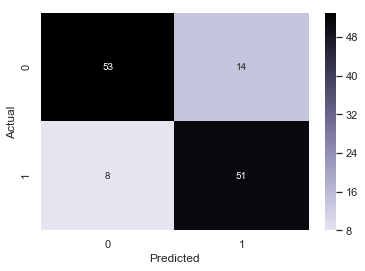

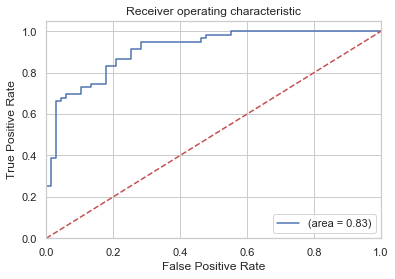

Accuracy of on test set: 0.83
Accuracy after cross validation: 0.77 (+/- 0.04)


In [90]:
compare_clf_model(LogisticRegression)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.97      0.97      0.97        59

   micro avg       0.97      0.97      0.97       126
   macro avg       0.97      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126



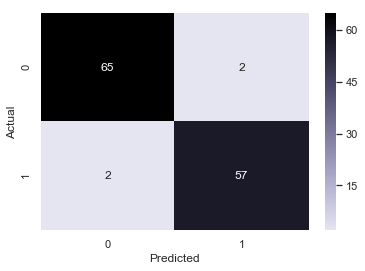

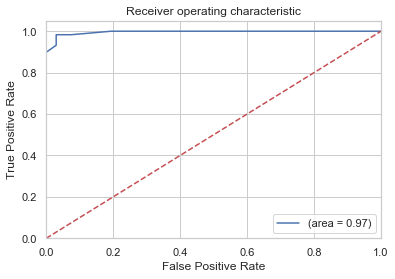

Accuracy of on test set: 0.97
Accuracy after cross validation: 0.97 (+/- 0.03)


In [83]:
compare_clf_model(RandomForestClassifier)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.95      0.97      0.96        59

   micro avg       0.96      0.96      0.96       126
   macro avg       0.96      0.96      0.96       126
weighted avg       0.96      0.96      0.96       126



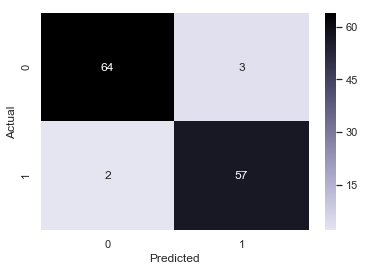

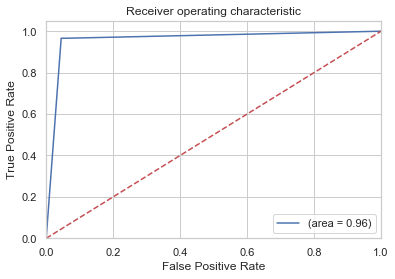

Accuracy of on test set: 0.96
Accuracy after cross validation: 0.96 (+/- 0.03)


In [84]:
compare_clf_model(DecisionTreeClassifier)

Above three classifier random forest gives the best accuracy i.e 97 for the current dataset.